In [68]:
import pandas as pd
import numpy as np
import pandas_profiling
# import libs for diagrams inline with the text
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

# other utilities
from sklearn import datasets, preprocessing, metrics

In [69]:
df3 = pd.read_csv('datasets/cardio_train.csv', delimiter=';')
print(df3.shape)
df3.head()

(70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


#### Getting information

In [70]:
df3.describe(include='all')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Checking for null values 

In [71]:
df3.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [72]:
df3.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

#### Checking for extreme values
###### In this is next part I will search this dataset for outliers using diagrams as visual aid + the z index and IQR

In [73]:
def iqr_calc(column):
    # IQR
    Q1 = np.percentile(df3[column], 25,
                   interpolation = 'midpoint')
 
    Q3 = np.percentile(df3[column], 75,
                   interpolation = 'midpoint')
    IQR = Q3 - Q1
    
    upperBound = (Q3+1.5*IQR)
    lowerBound = (Q1-1.5*IQR)

    # Above Upper bound
    upper = df3[column] >= upperBound
    print(column)
    print("Upper bound:",upperBound)
    print(np.where(upper))
 
    # Below Lower bound
    lower = df3[column] <= lowerBound
    print("Lower bound:", lowerBound)
    print(np.where(lower))
    
def z_score(column):
    # Z score 
    z = np.abs(stats.zscore(df3[column]))
    threshold = 3
    # Position of the outlier
    print(np.where(z > 3))

## Age

<AxesSubplot:>

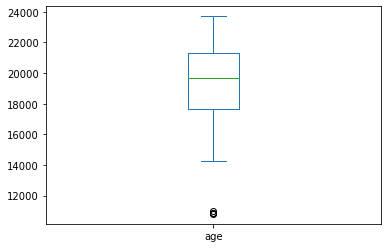

In [74]:
df3['age'].plot.box()

In [75]:
iqr_calc("age")

age
Upper bound: 26821.5
(array([], dtype=int64),)
Lower bound: 12169.5
(array([ 6219, 22343, 30666, 55905], dtype=int64),)


In [76]:
z_score("age")

(array([ 6219, 22343, 30666, 55905], dtype=int64),)


In [77]:
df3.drop(df3.index[df3['age'] < 12000], inplace=True)

#### I debated if i should remove the very low ages since there were no upper bound to remove however I think the distance justifies it.
### This is how the data looks now

<AxesSubplot:>

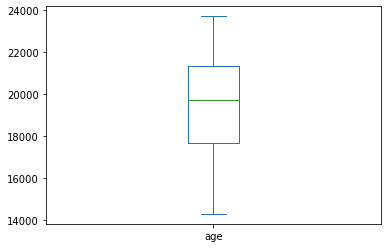

In [78]:
df3['age'].plot.box()

## Weight

<AxesSubplot:>

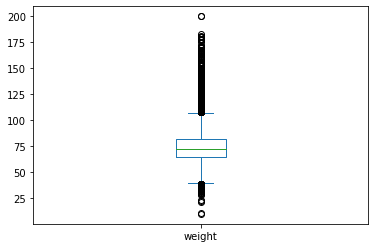

In [79]:
df3['weight'].plot.box()

In [80]:
iqr_calc("weight")

weight
Upper bound: 107.5
(array([   15,    62,    83, ..., 69943, 69977, 69992], dtype=int64),)
Lower bound: 39.5
(array([ 3752,  5794, 10446, 10626, 11875, 14721, 16321, 16905, 18558,
       19581, 22015, 25196, 26804, 29331, 29486, 31417, 32084, 33475,
       33508, 33814, 33817, 34273, 34279, 34325, 35311, 38414, 38740,
       40609, 41350, 41902, 43756, 44135, 44619, 48077, 48610, 51408,
       51541, 51834, 53221, 53942, 54014, 54679, 55336, 55849, 56910,
       57854, 58196, 60184, 60695, 63109, 65078, 65646], dtype=int64),)


In [81]:
z_score("weight")

(array([  338,   389,   435,   446,   591,   740,   786,   794,   956,
        1197,  1203,  1230,  1270,  1276,  1399,  1598,  1740,  1768,
        1916,  1935,  2030,  2230,  2251,  2337,  2340,  2363,  2368,
        2406,  2441,  2458,  2482,  2867,  2934,  3071,  3206,  3313,
        3344,  3351,  3413,  3446,  3457,  3591,  3661,  3752,  3823,
        4004,  4063,  4075,  4246,  4571,  4606,  4732,  4743,  4956,
        5059,  5191,  5424,  5436,  5566,  5586,  5623,  5930,  5977,
        6003,  6052,  6141,  6153,  6456,  6466,  6602,  6809,  7194,
        7262,  7351,  7420,  7474,  7635,  7931,  8170,  8213,  8422,
        8424,  8451,  8648,  8670,  8729,  8779,  8800,  8901,  8919,
        8977,  9073,  9103,  9129,  9338,  9353,  9400,  9437,  9593,
        9606,  9776,  9961, 10012, 10215, 10514, 10536, 10600, 10636,
       10693, 10740, 11225, 11228, 11240, 11392, 11534, 11903, 11965,
       12114, 12183, 12398, 12434, 12445, 12769, 12789, 13009, 13191,
       13549, 13619

### Because the data is impossible even tho there are more upper bound i need to remove them to have a realistic data set that is useable

In [82]:
df3.drop(df3.index[df3['weight'] < 40], inplace=True)
df3.drop(df3.index[df3['weight'] > 330], inplace=True)

<AxesSubplot:>

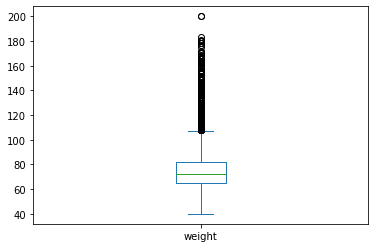

In [83]:
df3['weight'].plot.box()

## Height

<AxesSubplot:>

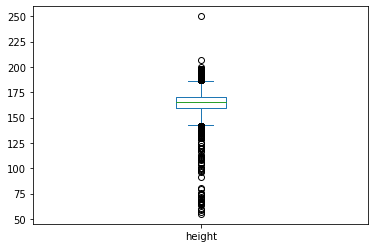

In [84]:
df3['height'].plot.box()

In [85]:
iqr_calc("height")

height
Upper bound: 186.5
(array([   62,    76,  1027,  1117,  1419,  2160,  2203,  2463,  2680,
        2883,  3212,  3237,  3401,  3621,  3629,  3906,  4480,  4825,
        4910,  5000,  5009,  5056,  5261,  5470,  5547,  5586,  5622,
        5750,  5796,  5953,  6053,  6341,  6483,  6556,  6600,  6727,
        6848,  7260,  8522,  8894,  8899,  9458,  9781, 10865, 11020,
       11443, 11472, 11703, 11898, 12001, 12009, 12165, 12727, 12858,
       12934, 13154, 13329, 13646, 14549, 14714, 14919, 15170, 15546,
       15662, 16004, 16218, 16801, 16926, 17632, 17836, 17913, 17939,
       17976, 18022, 18363, 18742, 19424, 20061, 20357, 20650, 20665,
       21033, 21617, 21673, 21810, 22242, 22576, 22660, 22890, 23100,
       23301, 23370, 23625, 23706, 23760, 23839, 24683, 24712, 24816,
       24906, 25045, 25155, 25162, 25338, 26406, 26594, 26651, 27170,
       27596, 27797, 27825, 28009, 28261, 28978, 29072, 29130, 29284,
       29498, 29765, 30110, 30221, 30264, 30529, 30652, 30684, 

In [86]:
z_score("height")

(array([  224,  1027,  1117,  2160,  2412,  2680,  2883,  2944,  3208,
        3212,  3237,  3420,  3621,  3629,  3735,  4211,  4480,  4825,
        5000,  5009,  5056,  5103,  5261,  5547,  5773,  5796,  6053,
        6151,  6341,  6483,  6600,  6727,  6818,  6848,  7113,  7302,
        7595,  8168,  8522,  8674,  8757,  8894,  9281,  9600,  9773,
        9781, 10092, 10563, 10865, 11178, 11225, 11443, 11703, 12001,
       12429, 12727, 12764, 12974, 13023, 13189, 13259, 13329, 13442,
       13864, 13946, 14067, 14317, 14549, 14714, 15160, 15359, 15546,
       15614, 16004, 16218, 16669, 16691, 16801, 16926, 17065, 17268,
       17307, 17836, 17913, 17939, 18022, 18083, 18363, 19661, 20017,
       20061, 20135, 20357, 20650, 20665, 21617, 21673, 22242, 22529,
       22710, 22805, 22890, 23011, 23100, 23370, 23764, 23839, 23900,
       23993, 24712, 24906, 24966, 25162, 25338, 26406, 26594, 26916,
       27369, 27588, 27797, 27825, 28261, 28498, 28722, 28727, 28882,
       28960, 29130

In [87]:
df3.drop(df3.index[df3['height'] < 150], inplace=True)
df3.drop(df3.index[df3['height'] > 200], inplace=True)

<AxesSubplot:>

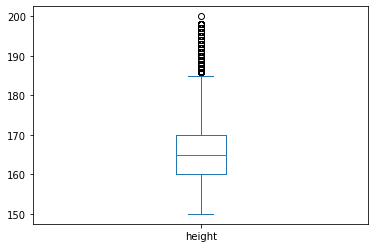

In [88]:
df3['height'].plot.box()

## Ap_lo

<AxesSubplot:>

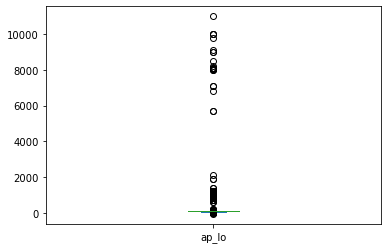

In [89]:
df3['ap_lo'].plot.box()

In [90]:
iqr_calc("ap_lo")

ap_lo
Upper bound: 105.0
(array([   96,   114,   224, ..., 68312, 68356, 68392], dtype=int64),)
Lower bound: 65.0
(array([    4,     9,    23, ..., 68359, 68363, 68403], dtype=int64),)


In [91]:
z_score("age")

(array([], dtype=int64),)


In [92]:
df3.drop(df3.index[df3['ap_lo'] > 105], inplace=True)
df3.drop(df3.index[df3['ap_lo'] < 65], inplace=True)

<AxesSubplot:>

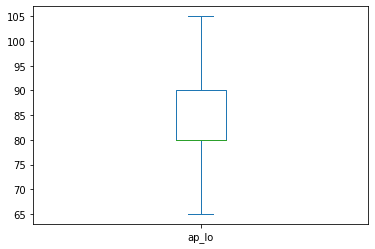

In [93]:
df3['ap_lo'].plot.box()

## Ap_hi

<AxesSubplot:>

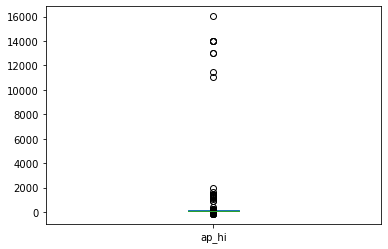

In [94]:
df3['ap_hi'].plot.box()

In [95]:
iqr_calc("ap_hi")

ap_hi
Upper bound: 170.0
(array([   40,    53,    55, ..., 63854, 63933, 63938], dtype=int64),)
Lower bound: 90.0
(array([  194,   512,   845,   894,  1066,  1385,  1466,  1492,  1985,
        1989,  2020,  2056,  2225,  2313,  2393,  2612,  2710,  2716,
        3158,  3375,  3408,  3464,  3493,  3525,  3578,  3621,  3923,
        4015,  4096,  4201,  4214,  4224,  4249,  4295,  4369,  4430,
        4483,  4795,  4878,  4934,  5280,  6029,  6860,  6884,  7106,
        7199,  7285,  7472,  7522,  7591,  7655,  8502,  8513,  8914,
        8951,  9818,  9987, 10078, 10120, 10176, 10597, 10618, 10688,
       11848, 11914, 12022, 12240, 12296, 12879, 12945, 13182, 13203,
       13233, 13277, 13455, 13517, 13718, 13851, 13914, 14399, 14592,
       14666, 15090, 15489, 16125, 16372, 16426, 16573, 16640, 16702,
       16866, 16958, 17436, 17615, 17725, 17726, 17811, 17984, 18156,
       18477, 18784, 18997, 19127, 19213, 19584, 20184, 20730, 21886,
       21931, 21985, 22109, 22131, 22225, 223

In [96]:
z_score("ap_hi")

(array([ 7114,  8165, 12729, 16225, 23276, 23324, 23569, 25733, 27108,
       33748, 37357, 37575, 39447, 39516, 39783, 42901, 43220, 44634,
       46472, 47028, 50713, 51079, 52366, 52930, 58498, 63362],
      dtype=int64),)


In [97]:
df3.drop(df3.index[df3['ap_hi'] > 170], inplace=True)
df3.drop(df3.index[df3['ap_hi'] < 90], inplace=True)

<AxesSubplot:>

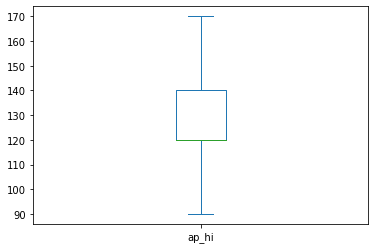

In [98]:
df3['ap_hi'].plot.box()

## Cholesterol

<AxesSubplot:>

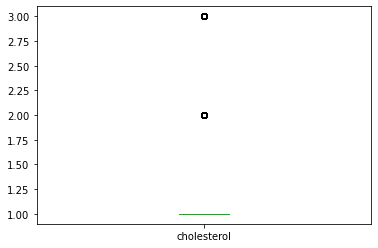

In [99]:
df3['cholesterol'].plot.box()


In [100]:
iqr_calc("cholesterol")

cholesterol
Upper bound: 1.0
(array([    0,     1,     2, ..., 63102, 63103, 63104], dtype=int64),)
Lower bound: 1.0
(array([    0,     3,     7, ..., 63100, 63101, 63103], dtype=int64),)


#### Nothing to change

#### Changed the age from days to years

In [101]:
df3['age']=df3['age']/365

#### Changed the age into a int

In [102]:
df3['age']=df3['age'].astype(int)


### After making the model I wanted to try to find out if I could use existing values to make new data out of that might correlate more with cardiovasculardisease

#### The BMI

#### I change height to be in meters

In [103]:
df3['height']=df3['height']/100

#### Run the formular

In [104]:
height2=(df3['height'])*(df3['height']);
df3['bmi']=(df3['weight']/height2)
df3['bmi']=df3['bmi'].astype(int)


In [105]:
df3['obese']=(df3['bmi']>30)
df3['obese']=df3['obese'].astype(int)
df3

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,obese
0,0,50,2,1.68,62.0,110,80,1,1,0,0,1,0,21,0
1,1,55,1,1.56,85.0,140,90,3,1,0,0,1,1,34,1
2,2,51,1,1.65,64.0,130,70,3,1,0,0,0,1,23,0
3,3,48,2,1.69,82.0,150,100,1,1,0,0,1,1,28,0
5,8,60,1,1.51,67.0,120,80,2,2,0,0,0,0,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,57,1,1.65,80.0,150,80,1,1,0,0,1,1,29,0
69995,99993,52,2,1.68,76.0,120,80,1,1,1,0,1,0,26,0
69996,99995,61,1,1.58,126.0,140,90,2,2,0,0,1,1,50,1
69998,99998,61,1,1.63,72.0,135,80,1,2,0,0,0,1,27,0


In [106]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(0, 2))
names = df3.columns
d = scaler.fit_transform(df3)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,obese
0,0.00000,0.88,2.0,0.750000,0.2750,0.50,0.75,0.0,0.0,0.0,0.0,2.0,0.0,0.290909,0.0
1,0.00002,1.28,0.0,0.250000,0.5625,1.25,1.25,2.0,0.0,0.0,0.0,2.0,2.0,0.763636,2.0
2,0.00004,0.96,0.0,0.625000,0.3000,1.00,0.25,2.0,0.0,0.0,0.0,0.0,2.0,0.363636,0.0
3,0.00006,0.72,2.0,0.791667,0.5250,1.50,1.75,0.0,0.0,0.0,0.0,2.0,2.0,0.545455,0.0
4,0.00016,1.68,0.0,0.041667,0.3375,0.75,0.75,1.0,1.0,0.0,0.0,0.0,0.0,0.581818,0.0


<AxesSubplot:>

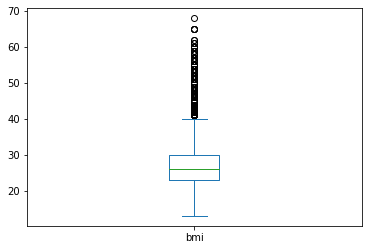

In [107]:
df3['bmi'].plot.box()


In [108]:
df3.drop(df3.index[df3['bmi'] < 13], inplace=True)
df3.drop(df3.index[df3['bmi'] > 120], inplace=True)

df3['bmi'].max()

68

##### pandas_profiling.ProfileReport(df3).to_file("cardio.html")


#### In this picture under, you can see that chol, bmi, weight and age all correlate with cardiovascular disease

In [109]:
corr = df3.corr(method="pearson")
cmap = sns.cm.vlag_r
corr.style.background_gradient(cmap=cmap)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,obese
id,1.000000,0.003687,0.004517,0.000517,0.001272,0.005798,0.003093,0.006402,0.003538,-0.002901,0.000651,0.004984,0.006327,0.000647,0.002632
age,0.003687,1.000000,-0.028654,-0.085170,0.048597,0.198979,0.143130,0.150350,0.095965,-0.049590,-0.029577,-0.010320,0.231522,0.093593,0.069428
gender,0.004517,-0.028654,1.000000,0.522102,0.146785,0.046900,0.050893,-0.038646,-0.023838,0.335725,0.170133,0.007158,-0.000356,-0.112827,-0.115495
height,0.000517,-0.085170,0.522102,1.000000,0.295757,0.003991,0.017746,-0.054720,-0.023607,0.194320,0.097727,-0.010040,-0.017641,-0.192215,-0.177651
weight,0.001272,0.048597,0.146785,0.295757,1.000000,0.245177,0.221256,0.140536,0.103759,0.064895,0.065366,-0.015138,0.167656,0.875035,0.672186
ap_hi,0.005798,0.198979,0.046900,0.003991,0.245177,1.000000,0.706924,0.193064,0.086916,0.023660,0.030542,0.001042,0.431781,0.248274,0.196345
ap_lo,0.003093,0.143130,0.050893,0.017746,0.221256,0.706924,1.000000,0.157340,0.066362,0.022239,0.033491,-0.000052,0.336745,0.216859,0.171595
cholesterol,0.006402,0.150350,-0.038646,-0.054720,0.140536,0.193064,0.157340,1.000000,0.451785,0.009939,0.032315,0.008567,0.218459,0.170415,0.144067
gluc,0.003538,0.095965,-0.023838,-0.023607,0.103759,0.086916,0.066362,0.451785,1.000000,-0.006832,0.008144,-0.007044,0.084535,0.117270,0.098322
smoke,-0.002901,-0.049590,0.335725,0.194320,0.064895,0.023660,0.022239,0.009939,-0.006832,1.000000,0.342562,0.024994,-0.018843,-0.030871,-0.029725


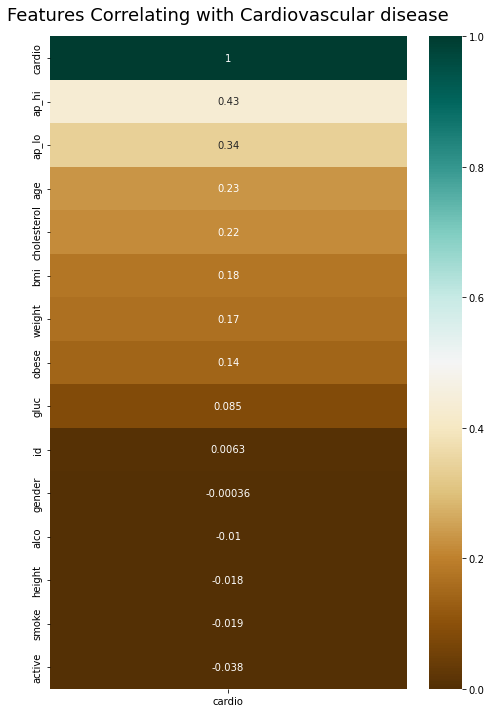

In [110]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df3.corr()[['cardio']].sort_values(by='cardio', ascending=False), vmin=0, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Cardiovascular disease', fontdict={'fontsize':18}, pad=16);

#### also found it interesting that chol and gluc had such a high correlation

#### Setting up data to be more graphical ready

In [111]:
stats=df3.copy()
def prepareForStats():
    ranges1 = [10,20,30,40,50,60,70,80,90,100]
    stats['bmi']=pd.cut(stats.bmi, ranges1)
    ranges2 = [0,10,20,30,40,50,60,70,80,90,100]
    stats['age']=pd.cut(df3.age, ranges2)

In [112]:
prepareForStats();

<AxesSubplot:xlabel='gender'>

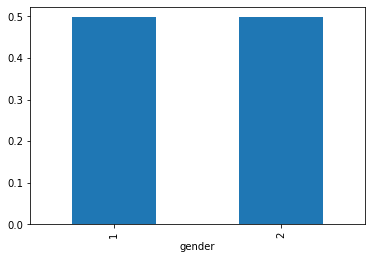

In [113]:
stats.groupby('gender')['cardio'].mean().plot(kind='bar')

<AxesSubplot:xlabel='cholesterol'>

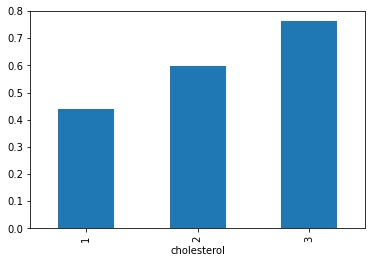

In [114]:
stats.groupby('cholesterol')['cardio'].mean().plot(kind='bar')

<AxesSubplot:xlabel='cholesterol'>

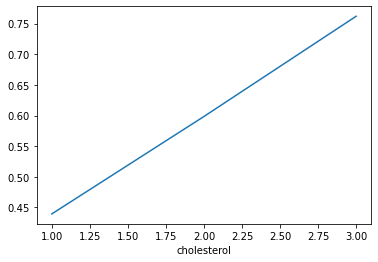

In [115]:
stats.groupby('cholesterol')['cardio'].mean().plot(kind='line')

<AxesSubplot:ylabel='cardio'>

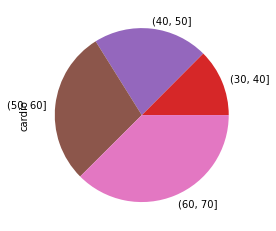

In [116]:
stats.groupby('age')['cardio'].mean().plot(kind='pie')

<AxesSubplot:xlabel='bmi'>

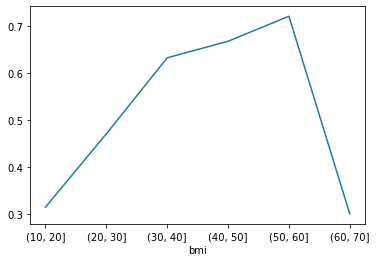

In [117]:
stats.groupby('bmi')['cardio'].mean().plot(kind='line')

### Deciding on the values to use for the model

In [118]:
#obese should maybe be gone
heartModelData=df3[['bmi', 'age', 'cholesterol','ap_lo','ap_hi','obese','cardio']].copy()
heartModelData

,bmi,age,cholesterol,ap_lo,ap_hi,obese,cardio
0,21,50,1,80,110,0,0
1,34,55,3,90,140,1,1
2,23,51,3,70,130,0,1
3,28,48,1,100,150,0,1
5,29,60,2,80,120,0,0
...,...,...,...,...,...,...,...
69994,29,57,1,80,150,0,1
69995,26,52,1,80,120,0,0
69996,50,61,2,90,140,1,1
69998,27,61,1,80,135,0,1


In [119]:
# Convert the dataset into two arrays

array = heartModelData.values
# Create two (sub) arrays from it
X = array[:,0:5] # data without class
y = array[:,6]   # just class
X

array([[ 21,  50,   1,  80, 110],
       [ 34,  55,   3,  90, 140],
       [ 23,  51,   3,  70, 130],
       ...,
       [ 50,  61,   2,  90, 140],
       [ 27,  61,   1,  80, 135],
       [ 24,  56,   2,  80, 120]], dtype=int64)

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size=0.2, random_state=25)

In [121]:
X_train

array([[ 24,  46,   1,  80, 120],
       [ 29,  44,   1,  80, 120],
       [ 20,  56,   1,  80, 120],
       ...,
       [ 25,  49,   1,  70, 110],
       [ 32,  57,   1, 100, 160],
       [ 35,  64,   1,  90, 150]], dtype=int64)

In [122]:
Y_train

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

# Improving model / finding better model

In [123]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import sklearn.ensemble as ske
from sklearn.cluster import KMeans

In [124]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('Forrest',ske.RandomForestClassifier()))
models.append(('Logression',LogisticRegression()))
models.append(('SVC',SVC()))

In [125]:
# value for seed to be used in all tests
seed = 7

#  the number of repeated trainings of one model
num_repeat = 10

In [126]:
scoring = 'accuracy'

In [127]:
results = []
names = []
def runModelFitting():
    for name, model in models:
        # prepare randomization of splits
        kfold = model_selection.KFold(n_splits=num_repeat, random_state=seed, shuffle=True)

        # implement the model and calculate a score based on 'accuracy' (scoring)
        cv_results = model_selection.cross_val_score(model, X_test, Y_test, cv=kfold, scoring=scoring)
        # store the result of this method in array results[]
        results.append(cv_results)

        # store the name of this method in array names[]
        names.append(name)

        # tell what you have done so far
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    
# repeat the same for next method

In [128]:
runModelFitting();

KNN: 0.678630 (0.013657)
NB: 0.717217 (0.007427)
Forrest: 0.683225 (0.012592)
Logression: 0.720228 (0.010623)
SVC: 0.712304 (0.011788)


### Top 3: Logression, SVC and NB
#### Now that I know they are the best I will look closer at different metrics

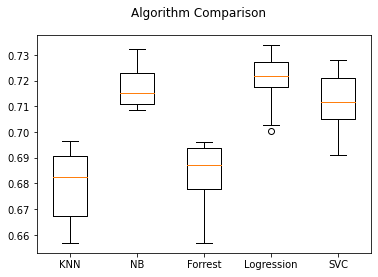

In [129]:
# Compare algorithms frame
fig = plt.figure()
fig.suptitle('Algorithm Comparison')

# x axis includes sub-plots
ax = fig.add_subplot(111)

# y axis result values
plt.boxplot(results)

# x axis labels
ax.set_xticklabels(names)

plt.show()

##### I want to look deeper so gonna run them seperate, 
###### funny/interesting is that after changing my outlier adjustment to include opinion of Z index and IQC, it changed from regression being the best to SVC

In [130]:
svc = SVC()
svc.fit(X_train, Y_train)
predictions = svc.predict(X_test)

# Calculated accuracy of the model over the validation set
print(accuracy_score(Y_test, predictions))

# Confusion matrix provides an indication of the three errors made ???? errors of predictions?
print(confusion_matrix(Y_test, predictions))

# Classification report provides a breakdown of each class by precision, recall, f1-score and support ????
print(classification_report(Y_test, predictions))

0.7212582204262736
[[5231 1148]
 [2370 3872]]
              precision    recall  f1-score   support

           0       0.69      0.82      0.75      6379
           1       0.77      0.62      0.69      6242

    accuracy                           0.72     12621
   macro avg       0.73      0.72      0.72     12621
weighted avg       0.73      0.72      0.72     12621



In [131]:
nb = GaussianNB()
nb.fit(X_train, Y_train)
predictions = nb.predict(X_test)

# Calculated accuracy of the model over the validation set
print(accuracy_score(Y_test, predictions))

# Confusion matrix provides an indication of the three errors made ???? errors of predictions?
print(confusion_matrix(Y_test, predictions))

# Classification report provides a breakdown of each class by precision, recall, f1-score and support ????
print(classification_report(Y_test, predictions))

0.716900404088424
[[5206 1173]
 [2400 3842]]
              precision    recall  f1-score   support

           0       0.68      0.82      0.74      6379
           1       0.77      0.62      0.68      6242

    accuracy                           0.72     12621
   macro avg       0.73      0.72      0.71     12621
weighted avg       0.72      0.72      0.71     12621



### Because of the context i want less false negative, So i choose logistic regression.

In [132]:
log = LogisticRegression()
log.fit(X_train, Y_train)
predictions = log.predict(X_test)

# Calculated accuracy of the model over the validation set
print(accuracy_score(Y_test, predictions))

# Confusion matrix provides an indication of the three errors made ???? errors of predictions?
print(confusion_matrix(Y_test, predictions))

# Classification report provides a breakdown of each class by precision, recall, f1-score and support ????
print(classification_report(Y_test, predictions))

0.7203866571587038
[[5003 1376]
 [2153 4089]]
              precision    recall  f1-score   support

           0       0.70      0.78      0.74      6379
           1       0.75      0.66      0.70      6242

    accuracy                           0.72     12621
   macro avg       0.72      0.72      0.72     12621
weighted avg       0.72      0.72      0.72     12621



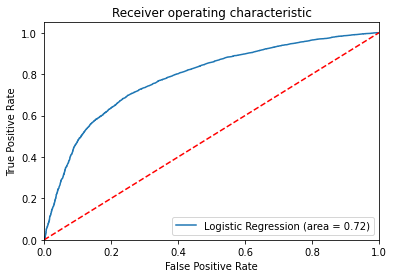

In [135]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, log.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, log.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### In all metrics this seems to work the best 
## Whuhu

In [136]:
# save the model to disk
import joblib

filename = 'deploy/data3_model.pkl'
joblib.dump(log, filename)

['deploy/data3_model.pkl']